In [ ]:
!pip install lightgbm optuna
!pip install optuna-integration[lightgbm]
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import optuna
from optuna.integration import LightGBMPruningCallback
import sys

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Senior_Thesis_Waseda/exp_sex')

In [ ]:
%run ../evaluation.ipynb
%run ../training.ipynb
%run ../parameter_optimization.ipynb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior_Thesis_Waseda/happiness_data.csv')
df.head()
df.shape

(97220, 82)

In [ ]:
income = pd.read_csv('/content/drive/MyDrive/Senior_Thesis_Waseda/happiness_data_pre_cluster.csv')
income = income.loc[:, ['D_INTERVIEW','Q260']]
income.head()

,D_INTERVIEW,Q260
0,196070011,1
1,196070036,2
2,196070039,2
3,196070040,2
4,196070053,2


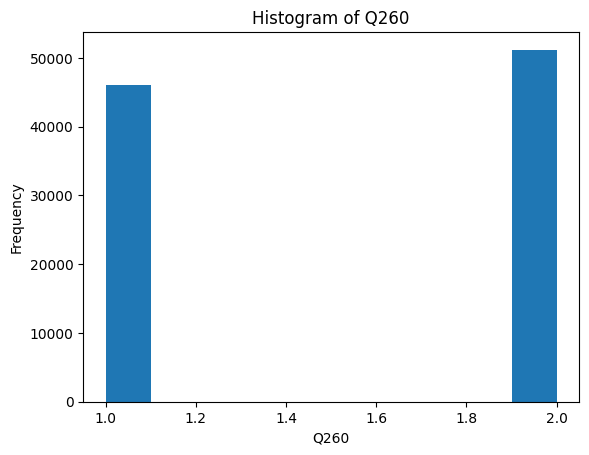

In [ ]:
import matplotlib.pyplot as plt

plt.hist(income['Q260'])
plt.xlabel('Q260')
plt.ylabel('Frequency')
plt.title('Histogram of Q260')
plt.show()

In [ ]:
df_merged = pd.merge(income, df, on='D_INTERVIEW')
df_merged.head()

,D_INTERVIEW,Q260,happiness,B_COUNTRY_ALPHA,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
0,196070011,1,7.333333,CYP,6.0,1,4.0,0.936297,-0.623011,-1.308899,...,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878,2,1,6,3
1,196070036,2,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,196070039,2,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,196070040,2,5.333333,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,196070053,2,4.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3


In [ ]:
df_merged = df_merged[df_merged['Q260'] == 2]
df_merged.head()

,D_INTERVIEW,Q260,happiness,B_COUNTRY_ALPHA,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
1,196070036,2,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,196070039,2,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,196070040,2,5.333333,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,196070053,2,4.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3
7,196070069,2,8.000000,CYP,6.0,1,4.0,0.936297,1.605107,0.764001,...,-0.335459,-0.174605,0.976462,-1.218074,-1.456204,0.884878,1,1,5,3


In [ ]:
categorical = ['Cl_73', 'Cl_74', 'Cl_75', 'Cl_76']

for col in categorical:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [ ]:
X = df_merged.loc[:, 'Cl_1':]
y = df_merged['happiness']

In [ ]:
parameter_optimization(X, y,
    save_path="exp_female_best_params.json")

[I 2025-06-15 05:59:49,859] A new study created in memory with name: lgbm_regression_opt


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.415623
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.413143
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.412424
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.411606
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.404142


[I 2025-06-15 06:11:59,791] Trial 0 finished with value: 0.4113874929039828 and parameters: {'num_leaves': 37, 'learning_rate': 0.059662768998574464, 'max_depth': 12, 'reg_alpha': 0.01689821456403644, 'reg_lambda': 0.008733286960935062, 'feature_fraction': 0.5545578611806954, 'bagging_fraction': 0.7944205512826226, 'bagging_freq': 4, 'min_data_in_leaf': 483}. Best is trial 0 with value: 0.4113874929039828.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.44568
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.442946
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.44357
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.442889
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.439297


[I 2025-06-15 06:27:25,509] Trial 1 finished with value: 0.44287620740919403 and parameters: {'num_leaves': 124, 'learning_rate': 0.008135993077935482, 'max_depth': 11, 'reg_alpha': 0.00016165526881359486, 'reg_lambda': 0.7035409156988579, 'feature_fraction': 0.4019026700531766, 'bagging_fraction': 0.5756856352296862, 'bagging_freq': 5, 'min_data_in_leaf': 459}. Best is trial 0 with value: 0.4113874929039828.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.953888
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.951408
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.950581
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.952995
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.951798


[I 2025-06-15 06:44:19,221] Trial 2 finished with value: 0.9521336844655476 and parameters: {'num_leaves': 59, 'learning_rate': 0.0031419355583659327, 'max_depth': 9, 'reg_alpha': 8.662924996503568, 'reg_lambda': 0.02194583099502228, 'feature_fraction': 0.47397242771581266, 'bagging_fraction': 0.9496188320394634, 'bagging_freq': 7, 'min_data_in_leaf': 153}. Best is trial 0 with value: 0.4113874929039828.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.49788
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.50043
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.49336
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.49785
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.49532


[I 2025-06-15 06:53:35,603] Trial 3 finished with value: 1.49696659215071 and parameters: {'num_leaves': 88, 'learning_rate': 0.0020393416894354194, 'max_depth': 3, 'reg_alpha': 0.004180382606157517, 'reg_lambda': 9.005175761589022, 'feature_fraction': 0.7078847726835956, 'bagging_fraction': 0.9258973847512997, 'bagging_freq': 1, 'min_data_in_leaf': 156}. Best is trial 0 with value: 0.4113874929039828.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.413654
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.409083
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.4109
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.40941
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.402017


[I 2025-06-15 07:13:07,499] Trial 4 finished with value: 0.4090130091696686 and parameters: {'num_leaves': 81, 'learning_rate': 0.03338461566965746, 'max_depth': 12, 'reg_alpha': 0.009228237972087388, 'reg_lambda': 4.420164028591646, 'feature_fraction': 0.6997672062599631, 'bagging_fraction': 0.8812298141809676, 'bagging_freq': 7, 'min_data_in_leaf': 251}. Best is trial 4 with value: 0.4090130091696686.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.985779
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.982245
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.979796
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.985142
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.983855


[I 2025-06-15 07:29:20,523] Trial 5 finished with value: 0.98336320089617 and parameters: {'num_leaves': 131, 'learning_rate': 0.0035756793567883233, 'max_depth': 6, 'reg_alpha': 0.0003352532574306502, 'reg_lambda': 0.04127989591553768, 'feature_fraction': 0.7891048128108265, 'bagging_fraction': 0.9397669501941917, 'bagging_freq': 1, 'min_data_in_leaf': 169}. Best is trial 4 with value: 0.4090130091696686.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.419419
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.414932
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.417257
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.415957
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.409526


[I 2025-06-15 07:38:26,675] Trial 6 finished with value: 0.4154181116213217 and parameters: {'num_leaves': 30, 'learning_rate': 0.07511737052942642, 'max_depth': 12, 'reg_alpha': 0.0009040884568982261, 'reg_lambda': 5.889870175124454, 'feature_fraction': 0.6664289643882277, 'bagging_fraction': 0.5580546342887509, 'bagging_freq': 5, 'min_data_in_leaf': 200}. Best is trial 4 with value: 0.4090130091696686.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.409916
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.408318
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.408132
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406191
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.400417


[I 2025-06-15 08:00:58,807] Trial 7 finished with value: 0.4065949351280792 and parameters: {'num_leaves': 149, 'learning_rate': 0.021584729121977998, 'max_depth': 12, 'reg_alpha': 7.376024827825465, 'reg_lambda': 0.0008077586571489891, 'feature_fraction': 0.6648231984664661, 'bagging_fraction': 0.8036760300859622, 'bagging_freq': 5, 'min_data_in_leaf': 204}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.417231
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.413557
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.415577
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.413631
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405952


[I 2025-06-15 08:15:58,194] Trial 8 finished with value: 0.41318962880267474 and parameters: {'num_leaves': 107, 'learning_rate': 0.027521448316098446, 'max_depth': 10, 'reg_alpha': 0.004026360901338699, 'reg_lambda': 0.000305705563511273, 'feature_fraction': 0.9006505683344346, 'bagging_fraction': 0.4151335109209015, 'bagging_freq': 2, 'min_data_in_leaf': 432}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.28371
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.28279
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.27758
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.28337
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.28106


[I 2025-06-15 08:27:12,296] Trial 9 finished with value: 1.281702805920307 and parameters: {'num_leaves': 26, 'learning_rate': 0.0024446594456802922, 'max_depth': 7, 'reg_alpha': 0.001499402648929466, 'reg_lambda': 0.006244650388242344, 'feature_fraction': 0.4870981102803031, 'bagging_fraction': 0.4813828127928418, 'bagging_freq': 1, 'min_data_in_leaf': 92}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 08:27:36,990] Trial 10 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.414022
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.411445
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.411633
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.410339
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404059


[I 2025-06-15 08:44:46,712] Trial 11 finished with value: 0.41029967169136083 and parameters: {'num_leaves': 72, 'learning_rate': 0.028114034068820244, 'max_depth': 9, 'reg_alpha': 0.18049197303944922, 'reg_lambda': 0.34512409552326406, 'feature_fraction': 0.6296645942023187, 'bagging_fraction': 0.819810144023043, 'bagging_freq': 7, 'min_data_in_leaf': 284}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 08:45:20,250] Trial 12 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 08:47:03,243] Trial 13 pruned. Trial was pruned at iteration 264.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 08:47:34,021] Trial 14 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 08:48:08,730] Trial 15 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.414157
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.411172
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.412956
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.410625
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.404068


[I 2025-06-15 09:07:10,349] Trial 16 finished with value: 0.4105956294896337 and parameters: {'num_leaves': 54, 'learning_rate': 0.04521189109160477, 'max_depth': 10, 'reg_alpha': 0.010061145548751751, 'reg_lambda': 1.7087530489429836, 'feature_fraction': 0.8624086565552432, 'bagging_fraction': 0.9987561539929737, 'bagging_freq': 4, 'min_data_in_leaf': 355}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 09:07:26,399] Trial 17 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 09:08:01,454] Trial 18 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 09:08:27,187] Trial 19 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 09:08:47,629] Trial 20 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.41228
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407611
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.408866
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.409222
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.401892


[I 2025-06-15 09:24:46,284] Trial 21 finished with value: 0.4079742525786635 and parameters: {'num_leaves': 77, 'learning_rate': 0.039278950418040956, 'max_depth': 9, 'reg_alpha': 0.14154405943530612, 'reg_lambda': 0.2835833892843662, 'feature_fraction': 0.6345014591864532, 'bagging_fraction': 0.7960179725530865, 'bagging_freq': 7, 'min_data_in_leaf': 281}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.412246
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.410297
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.411072
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.409211
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.402812


[I 2025-06-15 09:41:16,098] Trial 22 finished with value: 0.4091274135526689 and parameters: {'num_leaves': 81, 'learning_rate': 0.04676998078903025, 'max_depth': 12, 'reg_alpha': 0.007933178836437677, 'reg_lambda': 0.217074541962206, 'feature_fraction': 0.7252140483203631, 'bagging_fraction': 0.759508442563944, 'bagging_freq': 7, 'min_data_in_leaf': 209}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.41261
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407874
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.408912
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.409036
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.402238


[I 2025-06-15 09:57:33,637] Trial 23 finished with value: 0.4081341568572223 and parameters: {'num_leaves': 91, 'learning_rate': 0.04103250762123793, 'max_depth': 9, 'reg_alpha': 0.029136420576304948, 'reg_lambda': 1.6031421014353249, 'feature_fraction': 0.6714426247822578, 'bagging_fraction': 0.7539027784631227, 'bagging_freq': 6, 'min_data_in_leaf': 314}. Best is trial 7 with value: 0.4065949351280792.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.410751
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407608
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[478]	valid's rmse: 0.406949
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.407516
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.399682


[I 2025-06-15 10:11:10,878] Trial 24 finished with value: 0.4065011465628525 and parameters: {'num_leaves': 108, 'learning_rate': 0.06336694819664737, 'max_depth': 9, 'reg_alpha': 3.867755526076228, 'reg_lambda': 0.9348406243708022, 'feature_fraction': 0.51214378803766, 'bagging_fraction': 0.7500665176846019, 'bagging_freq': 6, 'min_data_in_leaf': 316}. Best is trial 24 with value: 0.4065011465628525.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.413187
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[473]	valid's rmse: 0.409204
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.410228
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.408923
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.401847


[I 2025-06-15 10:22:16,907] Trial 25 finished with value: 0.40867793134871916 and parameters: {'num_leaves': 109, 'learning_rate': 0.0689947499119543, 'max_depth': 7, 'reg_alpha': 3.3230340942899788, 'reg_lambda': 0.5848923083158751, 'feature_fraction': 0.5186236449813898, 'bagging_fraction': 0.6317598079811512, 'bagging_freq': 5, 'min_data_in_leaf': 397}. Best is trial 24 with value: 0.4065011465628525.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 10:22:39,402] Trial 26 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[280]	valid's rmse: 0.414458
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[332]	valid's rmse: 0.408779
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[241]	valid's rmse: 0.414082
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	valid's rmse: 0.410849
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[363]	valid's rmse: 0.4028


[I 2025-06-15 10:34:49,366] Trial 27 finished with value: 0.4101935565501667 and parameters: {'num_leaves': 115, 'learning_rate': 0.09710886778397912, 'max_depth': 10, 'reg_alpha': 0.5060960742444748, 'reg_lambda': 0.019424262915196205, 'feature_fraction': 0.6079842436366901, 'bagging_fraction': 0.821302168599524, 'bagging_freq': 4, 'min_data_in_leaf': 199}. Best is trial 24 with value: 0.4065011465628525.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 10:35:12,879] Trial 28 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 10:36:02,663] Trial 29 pruned. Trial was pruned at iteration 133.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407995
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405188
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404713
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.405424
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.397608


[I 2025-06-15 10:52:31,662] Trial 30 finished with value: 0.40418549400111436 and parameters: {'num_leaves': 121, 'learning_rate': 0.05299167964959084, 'max_depth': 11, 'reg_alpha': 9.687241816137865, 'reg_lambda': 0.04288228107423261, 'feature_fraction': 0.4773158834449913, 'bagging_fraction': 0.8435272392740099, 'bagging_freq': 4, 'min_data_in_leaf': 382}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[491]	valid's rmse: 0.408746
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407235
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406115
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[488]	valid's rmse: 0.405558
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.396782


[I 2025-06-15 11:08:51,068] Trial 31 finished with value: 0.4048871766838767 and parameters: {'num_leaves': 120, 'learning_rate': 0.05239062382120164, 'max_depth': 11, 'reg_alpha': 9.436676869888048, 'reg_lambda': 0.16392976230457612, 'feature_fraction': 0.4546224068640615, 'bagging_fraction': 0.8291824041969456, 'bagging_freq': 4, 'min_data_in_leaf': 395}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.410474
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[483]	valid's rmse: 0.406007
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406284
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[482]	valid's rmse: 0.406468
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.399615


[I 2025-06-15 11:24:47,176] Trial 32 finished with value: 0.40576944862389164 and parameters: {'num_leaves': 121, 'learning_rate': 0.06850364285859653, 'max_depth': 11, 'reg_alpha': 9.995185947346034, 'reg_lambda': 0.016239883960440536, 'feature_fraction': 0.44634485855518913, 'bagging_fraction': 0.8634566864841734, 'bagging_freq': 4, 'min_data_in_leaf': 438}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.408931
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[486]	valid's rmse: 0.405976
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[489]	valid's rmse: 0.40773
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.405687
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.399019


[I 2025-06-15 11:40:46,931] Trial 33 finished with value: 0.40546865918610664 and parameters: {'num_leaves': 122, 'learning_rate': 0.06270849367331252, 'max_depth': 11, 'reg_alpha': 2.1954476363511826, 'reg_lambda': 0.039223784575616566, 'feature_fraction': 0.44199007939080603, 'bagging_fraction': 0.8506313942155231, 'bagging_freq': 3, 'min_data_in_leaf': 445}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407893
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.40504
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.40816
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.405857
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.398475


[I 2025-06-15 11:57:26,473] Trial 34 finished with value: 0.4050850279982227 and parameters: {'num_leaves': 122, 'learning_rate': 0.05074896552762031, 'max_depth': 11, 'reg_alpha': 1.8183566721945073, 'reg_lambda': 0.014516952962389678, 'feature_fraction': 0.4363009200732659, 'bagging_fraction': 0.9101130932840624, 'bagging_freq': 3, 'min_data_in_leaf': 453}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.409675
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.405783
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.408256
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.40635
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.399358


[I 2025-06-15 12:15:32,691] Trial 35 finished with value: 0.40588434035847154 and parameters: {'num_leaves': 125, 'learning_rate': 0.0512143316968116, 'max_depth': 11, 'reg_alpha': 1.3555198374646094, 'reg_lambda': 0.04374371782188191, 'feature_fraction': 0.4364202768694744, 'bagging_fraction': 0.9897724569973502, 'bagging_freq': 2, 'min_data_in_leaf': 458}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.410881
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[462]	valid's rmse: 0.408655
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[376]	valid's rmse: 0.408831
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	valid's rmse: 0.407938
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[339]	valid's rmse: 0.40075


[I 2025-06-15 12:29:06,713] Trial 36 finished with value: 0.40741096964004003 and parameters: {'num_leaves': 140, 'learning_rate': 0.09570850269866368, 'max_depth': 10, 'reg_alpha': 2.492482965710174, 'reg_lambda': 0.013788002746999416, 'feature_fraction': 0.4024316292379947, 'bagging_fraction': 0.9229722731084016, 'bagging_freq': 3, 'min_data_in_leaf': 401}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 12:29:36,370] Trial 37 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407489
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405089
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407354
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404616
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.399056


[I 2025-06-15 12:48:49,609] Trial 38 finished with value: 0.4047207850839447 and parameters: {'num_leaves': 139, 'learning_rate': 0.03326987901249885, 'max_depth': 11, 'reg_alpha': 0.8733446033957647, 'reg_lambda': 0.0039397396879139145, 'feature_fraction': 0.4655471660005789, 'bagging_fraction': 0.950207427599782, 'bagging_freq': 2, 'min_data_in_leaf': 436}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 12:49:26,732] Trial 39 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 12:49:57,163] Trial 40 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[463]	valid's rmse: 0.411204
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.405757
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[478]	valid's rmse: 0.410457
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407369
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[451]	valid's rmse: 0.401195


[I 2025-06-15 13:07:21,552] Trial 41 finished with value: 0.40719644262074456 and parameters: {'num_leaves': 118, 'learning_rate': 0.07829384506148249, 'max_depth': 11, 'reg_alpha': 2.0522016444581577, 'reg_lambda': 0.010365892699545614, 'feature_fraction': 0.5013807250194053, 'bagging_fraction': 0.933231758519748, 'bagging_freq': 3, 'min_data_in_leaf': 500}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.409908
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.404825
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406605
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.405338
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.398544


[I 2025-06-15 13:24:04,947] Trial 42 finished with value: 0.40504414101030084 and parameters: {'num_leaves': 126, 'learning_rate': 0.05504537971252549, 'max_depth': 11, 'reg_alpha': 5.967111361354309, 'reg_lambda': 0.025408245134345395, 'feature_fraction': 0.4274509157602964, 'bagging_fraction': 0.9622402620952255, 'bagging_freq': 4, 'min_data_in_leaf': 455}. Best is trial 30 with value: 0.40418549400111436.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407685
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.403736
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.405117
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.403629
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.396525


[I 2025-06-15 13:41:42,611] Trial 43 finished with value: 0.4033384649903639 and parameters: {'num_leaves': 129, 'learning_rate': 0.05088526171878136, 'max_depth': 12, 'reg_alpha': 5.72429346436212, 'reg_lambda': 0.026580350955451564, 'feature_fraction': 0.40451183962390236, 'bagging_fraction': 0.9844514076529778, 'bagging_freq': 4, 'min_data_in_leaf': 416}. Best is trial 43 with value: 0.4033384649903639.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.407667
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404415
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405444
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.4039
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.397006


[I 2025-06-15 13:59:26,565] Trial 44 finished with value: 0.4036865841002763 and parameters: {'num_leaves': 129, 'learning_rate': 0.03831007512727737, 'max_depth': 12, 'reg_alpha': 5.654638902280851, 'reg_lambda': 0.17904902745175416, 'feature_fraction': 0.40994348741790604, 'bagging_fraction': 0.9570095116069477, 'bagging_freq': 4, 'min_data_in_leaf': 412}. Best is trial 43 with value: 0.4033384649903639.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[490]	valid's rmse: 0.407236
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.403897
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405374
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.403288
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.396341


[I 2025-06-15 14:17:13,104] Trial 45 finished with value: 0.4032271632905604 and parameters: {'num_leaves': 142, 'learning_rate': 0.038051904422334616, 'max_depth': 12, 'reg_alpha': 9.66085239657397, 'reg_lambda': 0.14365563430534337, 'feature_fraction': 0.4065072958670486, 'bagging_fraction': 0.9652324513643182, 'bagging_freq': 4, 'min_data_in_leaf': 414}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:17:42,912] Trial 46 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:18:09,470] Trial 47 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:18:43,276] Trial 48 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:19:13,626] Trial 49 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:19:40,790] Trial 50 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:20:08,711] Trial 51 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.410642
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.407888
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[443]	valid's rmse: 0.407782
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[478]	valid's rmse: 0.405426
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[420]	valid's rmse: 0.401099


[I 2025-06-15 14:35:29,370] Trial 52 finished with value: 0.406567384912963 and parameters: {'num_leaves': 112, 'learning_rate': 0.0783267636502483, 'max_depth': 10, 'reg_alpha': 5.627455818874587, 'reg_lambda': 0.1545126433876633, 'feature_fraction': 0.4220447378240029, 'bagging_fraction': 0.9747250376418951, 'bagging_freq': 4, 'min_data_in_leaf': 338}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.409017
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.405026
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.407333
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407142
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.398833


[I 2025-06-15 14:52:55,136] Trial 53 finished with value: 0.4054698913884864 and parameters: {'num_leaves': 103, 'learning_rate': 0.04458561219606647, 'max_depth': 11, 'reg_alpha': 6.700662279912459, 'reg_lambda': 0.02628310656475125, 'feature_fraction': 0.5009439876187505, 'bagging_fraction': 0.9345934909727918, 'bagging_freq': 5, 'min_data_in_leaf': 430}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:53:28,992] Trial 54 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 14:54:05,014] Trial 55 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407083
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404952
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407021
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.405369
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.39895


[I 2025-06-15 15:09:38,455] Trial 56 finished with value: 0.4046750591979548 and parameters: {'num_leaves': 150, 'learning_rate': 0.04016503261734051, 'max_depth': 10, 'reg_alpha': 6.778827560139024, 'reg_lambda': 0.08147888646084184, 'feature_fraction': 0.4246253673225779, 'bagging_fraction': 0.8328979957950029, 'bagging_freq': 4, 'min_data_in_leaf': 409}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 15:10:00,598] Trial 57 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 15:10:32,680] Trial 58 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 15:10:56,255] Trial 59 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.409224
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404844
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407114
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405808
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.400322


[I 2025-06-15 15:28:02,212] Trial 60 finished with value: 0.40546229638169945 and parameters: {'num_leaves': 130, 'learning_rate': 0.04417861248841885, 'max_depth': 10, 'reg_alpha': 2.84194307805554, 'reg_lambda': 0.09553652203202592, 'feature_fraction': 0.49747604334304685, 'bagging_fraction': 0.8804030875317664, 'bagging_freq': 3, 'min_data_in_leaf': 471}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.408222
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	valid's rmse: 0.405941
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[477]	valid's rmse: 0.407049
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[484]	valid's rmse: 0.405274
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.399693


[I 2025-06-15 15:43:22,995] Trial 61 finished with value: 0.40523577081967044 and parameters: {'num_leaves': 140, 'learning_rate': 0.08135132257007657, 'max_depth': 11, 'reg_alpha': 7.613845774068593, 'reg_lambda': 0.1456438538931806, 'feature_fraction': 0.4539235040752273, 'bagging_fraction': 0.8315607955934574, 'bagging_freq': 4, 'min_data_in_leaf': 388}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.407798
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[491]	valid's rmse: 0.405131
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.408927
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.405617
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.398887


[I 2025-06-15 16:01:55,920] Trial 62 finished with value: 0.40527199394478164 and parameters: {'num_leaves': 118, 'learning_rate': 0.05524425030442137, 'max_depth': 11, 'reg_alpha': 6.893098584827871, 'reg_lambda': 0.3117958090921873, 'feature_fraction': 0.4486227467585877, 'bagging_fraction': 0.9990953103051693, 'bagging_freq': 4, 'min_data_in_leaf': 365}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 16:02:29,037] Trial 63 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 16:02:57,033] Trial 64 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 16:04:20,757] Trial 65 pruned. Trial was pruned at iteration 198.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 16:04:34,780] Trial 66 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.408909
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.407804
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	valid's rmse: 0.407499
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.405238
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.398272


[I 2025-06-15 16:19:48,573] Trial 67 finished with value: 0.40554415322560516 and parameters: {'num_leaves': 138, 'learning_rate': 0.061571423126527, 'max_depth': 11, 'reg_alpha': 0.7675328015739386, 'reg_lambda': 0.009664777519884395, 'feature_fraction': 0.42417012121444964, 'bagging_fraction': 0.870657286609761, 'bagging_freq': 4, 'min_data_in_leaf': 302}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 16:20:18,863] Trial 68 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.408421
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405141
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406263
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.4061
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.398962


[I 2025-06-15 16:35:17,906] Trial 69 finished with value: 0.4049773634502231 and parameters: {'num_leaves': 150, 'learning_rate': 0.04508650932326902, 'max_depth': 11, 'reg_alpha': 0.026136693114484428, 'reg_lambda': 0.18067028567344173, 'feature_fraction': 0.4345870028468825, 'bagging_fraction': 0.7372744590736783, 'bagging_freq': 5, 'min_data_in_leaf': 441}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 16:36:16,357] Trial 70 pruned. Trial was pruned at iteration 138.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[485]	valid's rmse: 0.409418
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[480]	valid's rmse: 0.408019
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.406818
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.406435
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.397738


[I 2025-06-15 16:50:44,146] Trial 71 finished with value: 0.40568532987532746 and parameters: {'num_leaves': 150, 'learning_rate': 0.06855012644171375, 'max_depth': 11, 'reg_alpha': 0.021369802239425723, 'reg_lambda': 0.18028968352273095, 'feature_fraction': 0.4345548282167746, 'bagging_fraction': 0.7332106228482896, 'bagging_freq': 5, 'min_data_in_leaf': 443}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.407336
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406964
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.407154
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.404357
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.397181


[I 2025-06-15 17:06:29,194] Trial 72 finished with value: 0.4045984331983556 and parameters: {'num_leaves': 146, 'learning_rate': 0.04469343958475241, 'max_depth': 12, 'reg_alpha': 0.007880820026062932, 'reg_lambda': 0.2530279865232249, 'feature_fraction': 0.41220531444911224, 'bagging_fraction': 0.7763657525005988, 'bagging_freq': 5, 'min_data_in_leaf': 467}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.40959
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[491]	valid's rmse: 0.407937
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.407312
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.405583
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.398429


[I 2025-06-15 17:21:45,943] Trial 73 finished with value: 0.40577030484171217 and parameters: {'num_leaves': 134, 'learning_rate': 0.05429815470793007, 'max_depth': 12, 'reg_alpha': 0.0029373606277724564, 'reg_lambda': 0.6656782459504463, 'feature_fraction': 0.42018008462705575, 'bagging_fraction': 0.7773290417461409, 'bagging_freq': 4, 'min_data_in_leaf': 462}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:22:17,578] Trial 74 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:23:20,689] Trial 75 pruned. Trial was pruned at iteration 83.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:23:40,655] Trial 76 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:24:46,677] Trial 77 pruned. Trial was pruned at iteration 117.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:25:13,624] Trial 78 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[484]	valid's rmse: 0.409812
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.407218
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[474]	valid's rmse: 0.409262
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[483]	valid's rmse: 0.404668
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.398173


[I 2025-06-15 17:40:42,651] Trial 79 finished with value: 0.4058263193577648 and parameters: {'num_leaves': 145, 'learning_rate': 0.06800802737250995, 'max_depth': 11, 'reg_alpha': 4.692715780083984, 'reg_lambda': 0.019847795439784908, 'feature_fraction': 0.4848838933643454, 'bagging_fraction': 0.7641892879769124, 'bagging_freq': 4, 'min_data_in_leaf': 467}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:41:10,647] Trial 80 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.408253
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405833
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406171
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.40637
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.399408


[I 2025-06-15 17:55:31,553] Trial 81 finished with value: 0.40520699287391737 and parameters: {'num_leaves': 148, 'learning_rate': 0.04670378684313856, 'max_depth': 11, 'reg_alpha': 0.031718261021217234, 'reg_lambda': 0.2076186798504555, 'feature_fraction': 0.43307869525786297, 'bagging_fraction': 0.7281406431786936, 'bagging_freq': 5, 'min_data_in_leaf': 434}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:55:55,624] Trial 82 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:56:22,330] Trial 83 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 17:56:47,913] Trial 84 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.408642
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406183
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406553
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.406441
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.398563


[I 2025-06-15 18:13:25,475] Trial 85 finished with value: 0.4052763110340548 and parameters: {'num_leaves': 147, 'learning_rate': 0.051628752468208736, 'max_depth': 12, 'reg_alpha': 0.002755325334653804, 'reg_lambda': 0.08287301353810891, 'feature_fraction': 0.4682855413464149, 'bagging_fraction': 0.7915084672343666, 'bagging_freq': 4, 'min_data_in_leaf': 499}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 18:13:54,270] Trial 86 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[489]	valid's rmse: 0.408118
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	valid's rmse: 0.406758
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.407124
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.40442
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.397478


[I 2025-06-15 18:29:19,303] Trial 87 finished with value: 0.40477951366734277 and parameters: {'num_leaves': 133, 'learning_rate': 0.0728045469773064, 'max_depth': 11, 'reg_alpha': 3.342300396665233, 'reg_lambda': 0.5516605791379887, 'feature_fraction': 0.4108536701262684, 'bagging_fraction': 0.9541902296808885, 'bagging_freq': 6, 'min_data_in_leaf': 429}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[467]	valid's rmse: 0.407123
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.406277
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[485]	valid's rmse: 0.407294
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.405804
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.398343


[I 2025-06-15 18:45:02,242] Trial 88 finished with value: 0.4049682721576343 and parameters: {'num_leaves': 130, 'learning_rate': 0.074344894174587, 'max_depth': 12, 'reg_alpha': 3.2469397968013625, 'reg_lambda': 1.4730237798795114, 'feature_fraction': 0.40959812222088604, 'bagging_fraction': 0.918072079751192, 'bagging_freq': 7, 'min_data_in_leaf': 379}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 18:45:31,537] Trial 89 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 18:47:54,067] Trial 90 pruned. Trial was pruned at iteration 356.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.408143
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405407
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[476]	valid's rmse: 0.408519
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.404705
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.39744


[I 2025-06-15 19:04:03,875] Trial 91 finished with value: 0.40484274279627847 and parameters: {'num_leaves': 131, 'learning_rate': 0.07103110693490707, 'max_depth': 12, 'reg_alpha': 3.1723968513037852, 'reg_lambda': 2.9242948377502027, 'feature_fraction': 0.4133551213214643, 'bagging_fraction': 0.9263231308996119, 'bagging_freq': 7, 'min_data_in_leaf': 382}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[477]	valid's rmse: 0.408525
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[464]	valid's rmse: 0.405475
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[483]	valid's rmse: 0.408698
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.405813
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.400737


[I 2025-06-15 19:20:22,124] Trial 92 finished with value: 0.40584951733773683 and parameters: {'num_leaves': 128, 'learning_rate': 0.07471531550357838, 'max_depth': 12, 'reg_alpha': 0.0004869847820813857, 'reg_lambda': 4.071219724712715, 'feature_fraction': 0.4229360302887711, 'bagging_fraction': 0.943154975893376, 'bagging_freq': 7, 'min_data_in_leaf': 346}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[489]	valid's rmse: 0.407422
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.404386
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.40585
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[483]	valid's rmse: 0.404563
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.398382


[I 2025-06-15 19:37:53,239] Trial 93 finished with value: 0.40412066039798605 and parameters: {'num_leaves': 132, 'learning_rate': 0.05936967578254623, 'max_depth': 12, 'reg_alpha': 8.309330200830894, 'reg_lambda': 2.3860970031234765, 'feature_fraction': 0.4488361897136468, 'bagging_fraction': 0.9309059471315769, 'bagging_freq': 6, 'min_data_in_leaf': 408}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[489]	valid's rmse: 0.408735
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.404565
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.405902
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[439]	valid's rmse: 0.404919
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.398483


[I 2025-06-15 19:54:28,624] Trial 94 finished with value: 0.40452086875831383 and parameters: {'num_leaves': 132, 'learning_rate': 0.05759976896559693, 'max_depth': 12, 'reg_alpha': 4.283476304317515, 'reg_lambda': 2.736219948693402, 'feature_fraction': 0.44417878278313294, 'bagging_fraction': 0.928338756358109, 'bagging_freq': 6, 'min_data_in_leaf': 409}. Best is trial 45 with value: 0.4032271632905604.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:54:58,552] Trial 95 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:57:23,673] Trial 96 pruned. Trial was pruned at iteration 342.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:57:53,424] Trial 97 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:58:22,473] Trial 98 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:59:00,640] Trial 99 pruned. Trial was pruned at iteration 50.


In [ ]:
model, test_rmse= training(X, y,
    params_json_path="exp_female_best_params.json",
    save_model_path='exp_female_model.txt',
    save_log_filename="exp_female_log.csv")

Training until validation scores don't improve for 50 rounds
[50]	valid's rmse: 0.625324	valid's l2: 0.39103
[100]	valid's rmse: 0.440189	valid's l2: 0.193766
[150]	valid's rmse: 0.417635	valid's l2: 0.174419
[200]	valid's rmse: 0.412511	valid's l2: 0.170165
[250]	valid's rmse: 0.41042	valid's l2: 0.168445
[300]	valid's rmse: 0.408724	valid's l2: 0.167055
[350]	valid's rmse: 0.40773	valid's l2: 0.166244
[400]	valid's rmse: 0.407076	valid's l2: 0.165711
[450]	valid's rmse: 0.406516	valid's l2: 0.165255
[500]	valid's rmse: 0.406032	valid's l2: 0.164862
[550]	valid's rmse: 0.405462	valid's l2: 0.164399
[600]	valid's rmse: 0.405143	valid's l2: 0.164141
[650]	valid's rmse: 0.404933	valid's l2: 0.163971
[700]	valid's rmse: 0.404661	valid's l2: 0.163751
[750]	valid's rmse: 0.404507	valid's l2: 0.163626
[800]	valid's rmse: 0.404298	valid's l2: 0.163457
[850]	valid's rmse: 0.404259	valid's l2: 0.163426
[900]	valid's rmse: 0.404034	valid's l2: 0.163244
[950]	valid's rmse: 0.403901	valid's l2: 0.

In [ ]:
# Compute the standard deviation of y
std_y = y.std()
print(f"The standard deviation of y is: {std_y}")

The standard deviation of y is: 1.8377790329156762


In [ ]:
evaluation(model,
    X.sample(10000),
    name = "exp_female_results",
    max_display=30)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>